# **K Nearest Neighbors (KNN)**

KNN is a simple and straightforward algorithm used for both classification and regression tasks, but it is most commonly used for classification problems. KNN is a lazy learning algorithm, which means that it does not require any initial training from the training data. Instead, it classifies data points based on the distance between other data points given a initial parameter k. KNN assumes that data points that are closer to each other are similar have a high probability of being in the same class.

The K value is used to determine the number of nearest neighbors the model needs to consider when making prediction on new unseen data. The only parameter important in KNN is the determine the best value for K. Well, there is no direct approach for finding K value that is best for the mode, but there are some ways,

## **How to find the best K value?**

1. Cross Validation
2. Grid Search
3. Dataset size proportion
4. Expirimentation

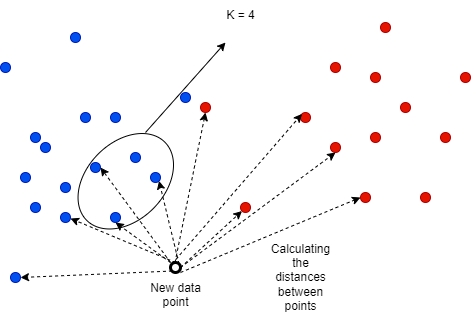


Based on the diagram, when a new data point is added to the graph, the KNN algorithm calculates the Euclidean distance between that point and all other points on the plane. In this case, the new point is more likely to be classified as belonging to the blue class because its distance to the blue class points is smaller than the distance to the red class points.

The K value in the image is 4, that means, we need to consider atleast consider 4 neighbors to determine if the data points belong to that particular class.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

data = load_iris()

In [ ]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']

In [ ]:
df['Species'] = data['target']

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


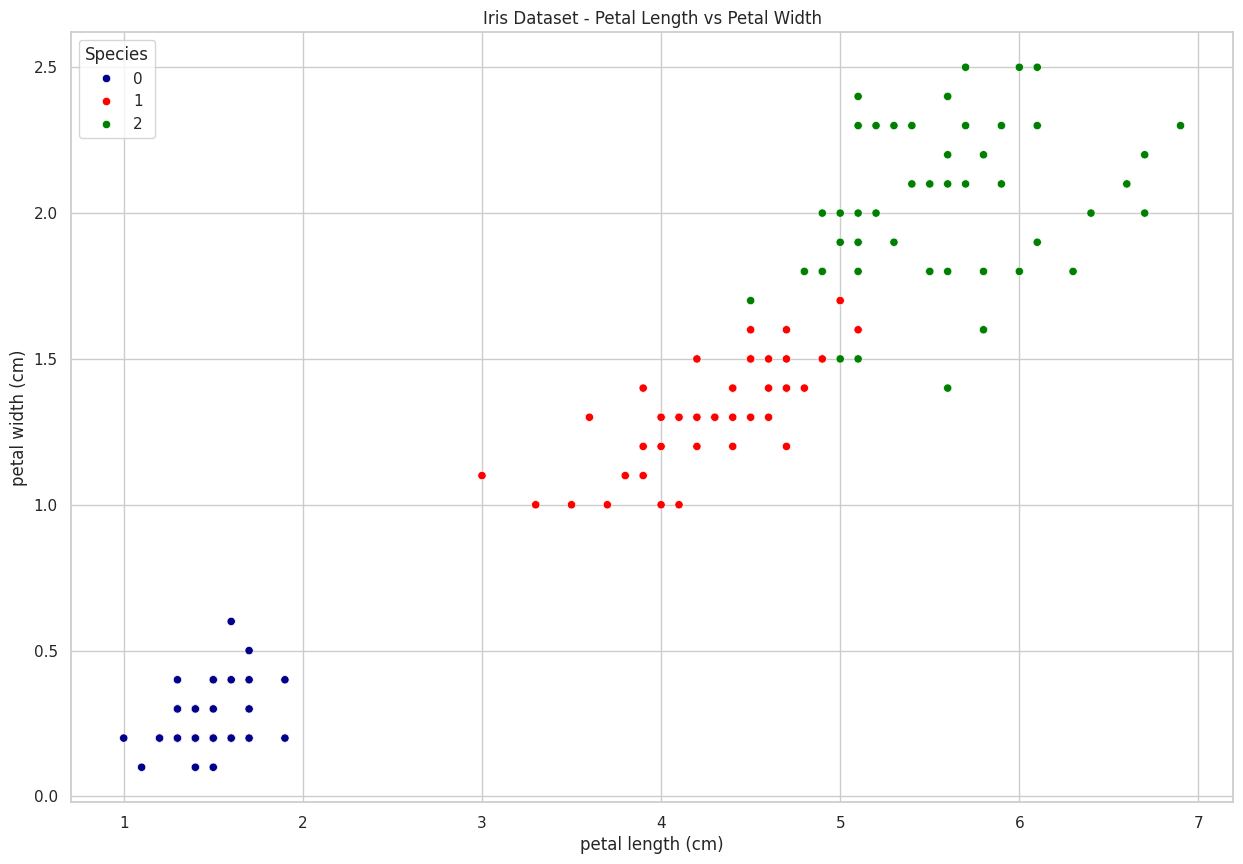

In [ ]:
sns.set(style="whitegrid")

# Scatter plot using seaborn with custom color palette
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='Species', palette = {0:'darkblue', 1:'red', 2:'green'})
plt.title('Iris Dataset - Petal Length vs Petal Width')
plt.show()

In [ ]:
class KNN:

    def __init__(self, k = 3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:

            # Calculating the euclidian distances between points
            distances = np.linalg.norm(self.X_train - x, axis = 1)
            # argsort returns the indices that can sort the array
            k_neighbors_indices = np.argsort(distances)[:self.k]

            # Finding the labels nearest to the current data point
            k_neighbors_labels = self.y_train[k_neighbors_indices]
            prediction = np.argmax(np.bincount(k_neighbors_labels))
            predictions.append(prediction)

        return np.array(predictions)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size = 0.2, random_state = 42)

In [ ]:
knn = KNN()
knn.fit(X_train, y_train)

In [71]:
from sklearn.metrics import accuracy_score, classification_report, precision_score
prediction = knn.predict(X_test)
print("Accuracy:", accuracy_score(prediction, y_test))

Accuracy: 1.0


In [72]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [75]:
from sklearn.neighbors import KNeighborsClassifier


classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
sk_model_prediction = classifier.predict(X_test)
print(accuracy_score(sk_model_prediction, y_test))

1.0
